# Goal
The goal is to perform funnel analysis for an e-commerce website.

Typically, websites have a clear path to conversion: for instance, you land on the home page,
then you search, select a product, and buy it. At each of these steps, some users will drop off
and leave the site. The sequence of pages that lead to conversion is called 'funnel'.

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to
understand where/when our users abandon the website. It gives crucial insights on user
behavior and on ways to improve the user experience. Also, it often allows to discover bugs.

# Challenge Description

You are looking at data from an e-commerce website. The site is very simple and has just 4
pages:

* The first page is the home page. When you come to the site for the first time, you can
only land on the home page as a first page.
* From the home page, the user can perform a search and land on the search page.
* From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.
* If she does decide to buy, she ends up on the confirmation page

The company CEO isn't very happy with the ]oluTe oM sales and, especially, oM sales coming
from new users. Therefore, she asked you to investigate whether there is something wrong in
the conversion funnel or, in general, if you could suggest how conversion rate can be improved.
Specifically, she is interested in :

* A full picture of funnel conversion rate for both desktop and mobile
* Some insights on what the product team should focus on in order to improve
conversion rate as well as anything you might discover that could help improve conversion rate.


# Data
## 1. user_table
### columns:
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other
tables
* date : the date when the user firstly landed on the site
* device : user device. Can be mobile or desktop
* sex : male/female


## 2. home_page_table
### columns:
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other
tables
* page : it is always home_page.


## 3.search_page_table
### columns:

* user_id : the Id of the user. It is unique by user and can be joined to user id in all other
tables
* page : it is always search_page

## 4. payment_page_table
### columns:

* user_id : the Id of the user. It is unique by user and can be joined to user id in all other
tables
* page : it is always payment_page

## 5. payment_confirmation_table

### columns:
* user_id : the Id of the user. It is unique by user and can be joined to user id in all other
tables
* page : it is always payment_confirmation_page


In [58]:
# load the data
import pandas as pd
from plotly import graph_objects as go

In [ ]:
user_table = pd.read_csv('user_table.csv')
home_page_table = pd.read_csv('home_page_table.csv')
search_page_table = pd.read_csv('search_page_table.csv')
payment_page_table = pd.read_csv('payment_page_table.csv')
payment_confirmation_table = pd.read_csv('payment_confirmation_table.csv')

In [32]:
#no null for user_table
#change type of date
user_table.info()
user_table['date'] = pd.to_datetime(user_table.iloc[:, 1])
print('# of unique user:', len(user_table['user_id'].unique()))
user_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  90400 non-null  int64         
 1   date     90400 non-null  datetime64[ns]
 2   device   90400 non-null  object        
 3   sex      90400 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   user_id  90400 non-null  int64         
 1   date     90400 non-null  datetime64[ns]
 2   device   90400 non-null  object        
 3   sex      90400 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.8+ MB
# of unique user: 90400


,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [13]:
# no null data, no duplicate
home_page_table.info()
print('# of unique user:', len(home_page_table['user_id'].unique()))
print('mark of page:', home_page_table['page'].unique())
home_page_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  90400 non-null  int64 
 1   page     90400 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB
# of unique user: 90400
['home_page']


,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [14]:
# no null data, no duplicate
search_page_table.info()
print('# of unique user:', len(search_page_table['user_id'].unique()))
print('mark of page:', search_page_table['page'].unique())
search_page_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  45200 non-null  int64 
 1   page     45200 non-null  object
dtypes: int64(1), object(1)
memory usage: 706.4+ KB
# of unique user: 45200
mark of page: ['search_page']


,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [17]:
# no null data, no duplicate
payment_page_table.info()
print('# of unique user:', len(payment_page_table['user_id'].unique()))
print('mark of page:', payment_page_table['page'].unique())
payment_page_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6030 non-null   int64 
 1   page     6030 non-null   object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB
# of unique user: 6030
mark of page: ['payment_page']


,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [23]:
payment_confirmation_table.info()
print('# of unique user:', len(payment_confirmation_table['user_id'].unique()))
print('mark of page:', payment_confirmation_table['page'].unique())
payment_confirmation_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  452 non-null    int64 
 1   page     452 non-null    object
dtypes: int64(1), object(1)
memory usage: 7.2+ KB
# of unique user: 452
mark of page: ['payment_confirmation_page']


,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [46]:
#merge other table to user_table
conversion_table = user_table.merge(home_page_table, on = 'user_id', how = 'left')
conversion_table = conversion_table.merge(search_page_table, on = 'user_id', how = 'left', suffixes = ('_home','_search'))
conversion_table = conversion_table.merge(payment_page_table, on = 'user_id', how = 'left')
conversion_table = conversion_table.merge(payment_confirmation_table, on = 'user_id', how = 'left', suffixes= ('_payment', '_payment_confirmation'))

In [48]:
#look at conversion table
conversion_table.info()
conversion_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    90400 non-null  int64         
 1   date                       90400 non-null  datetime64[ns]
 2   device                     90400 non-null  object        
 3   sex                        90400 non-null  object        
 4   page_home                  90400 non-null  object        
 5   page_search                45200 non-null  object        
 6   page_payment               6030 non-null   object        
 7   page_payment_confirmation  452 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.2+ MB


,user_id,date,device,sex,page_home,page_search,page_payment,page_payment_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


<AxesSubplot:xlabel='sex'>

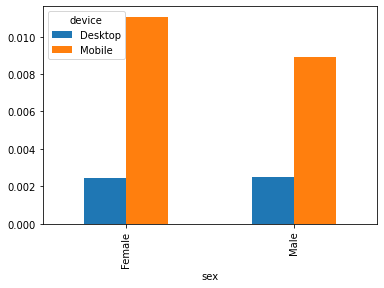

In [138]:
#look at conversion rate for different sex and different device
#obversely, mobile user have higher conversion rate.
conversion_date_sex_device = conversion_table.groupby(['sex','device'])['page_payment_confirmation'].count()/conversion_table.groupby(['sex','device'])['user_id'].count()
conversion_date_sex_device = conversion_date_sex_device.reset_index()
conversion_date_sex_device.set_axis(['sex', 'device', 'user_count'], axis = 'columns', inplace = True)
conversion_date_sex_device = conversion_date_sex_device.pivot(index = 'sex', columns = 'device', values = 'user_count')
conversion_date_sex_device.plot.bar()

In [139]:
# But mobile user less than desktop user. To improve the conversion rate, can attract more mobile user.
conversion_table.groupby('device')['user_id'].count()

device
Desktop    60200
Mobile     30200
Name: user_id, dtype: int64

In [140]:
# look at conversion rate for different sex, female have higher conversion rate than male
conversion_table.groupby(['sex'])['page_payment_confirmation'].count()/conversion_table.groupby(['sex'])['user_id'].count()

sex
Female    0.005347
Male      0.004655
dtype: float64

<AxesSubplot:xlabel='date'>

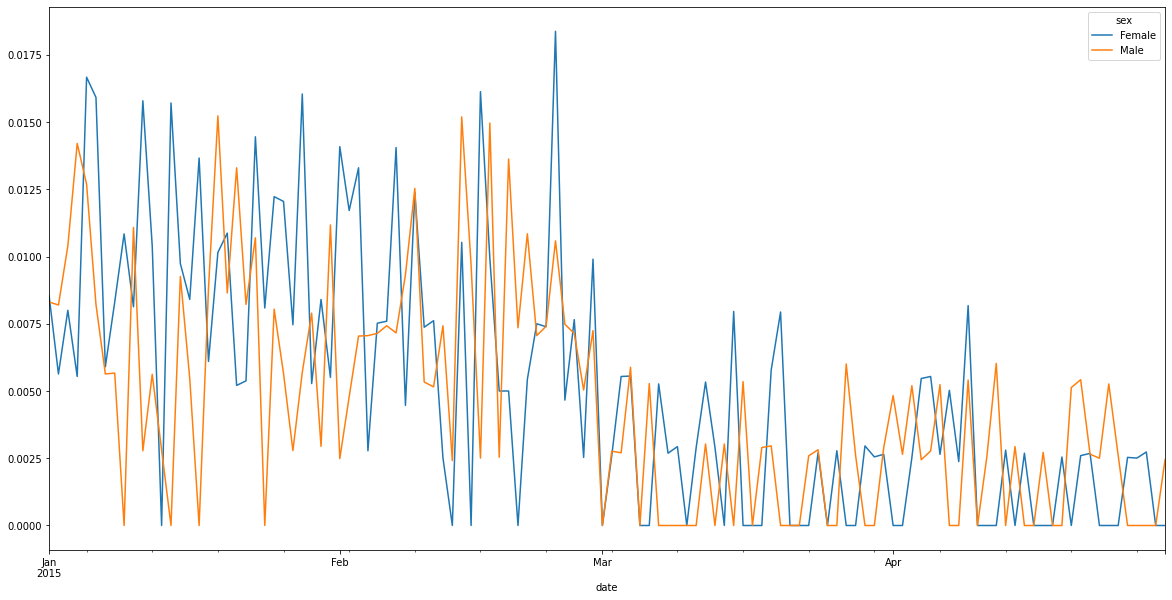

In [159]:
# then we can look at conversion rate for each day for different sex and device
# while the conversion rate change everyday, conversion rate decrease to its half around March
conversion_date_sex = conversion_table.groupby(['date', 'sex'])['page_payment_confirmation'].count()/conversion_table.groupby(['date', 'sex'])['user_id'].count()
conversion_date_sex = conversion_date_sex.reset_index()
conversion_date_sex.set_axis(['date', 'sex', 'user_count'], axis = 'columns', inplace = True)
conversion_date_sex = conversion_date_sex.pivot(index = 'date', columns = 'sex', values = 'user_count')
conversion_date_sex.fillna(0)
conversion_date_sex.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

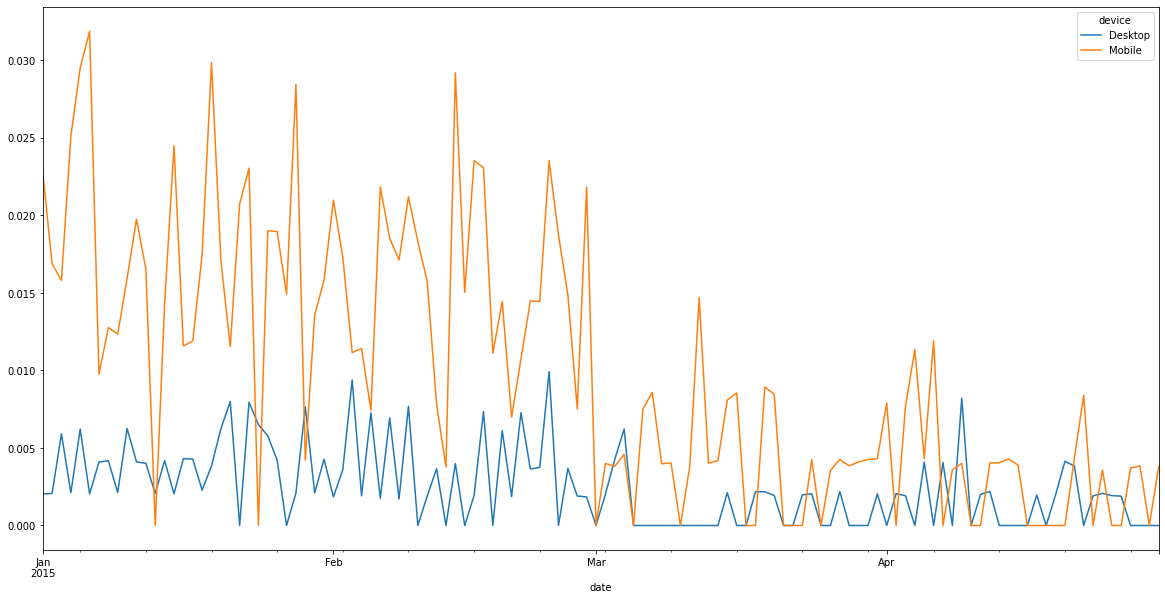

In [171]:
# look at the conversion rate for different device
# the conversion rate of mobile and desktop user is decrease after March
conversion_date_device = conversion_table.groupby(['date', 'device'])['page_payment_confirmation'].count()/conversion_table.groupby(['date', 'device'])['user_id'].count()
conversion_date_device = conversion_date_device.reset_index()
conversion_date_device.set_axis(['date', 'device', 'user_count'], axis = 'columns', inplace = True)
conversion_date_device = conversion_date_device.pivot(index = 'date', columns = 'device', values = 'user_count')
conversion_date_device.fillna(0)
conversion_date_device.plot.line(figsize = (20, 10))


<AxesSubplot:xlabel='date'>

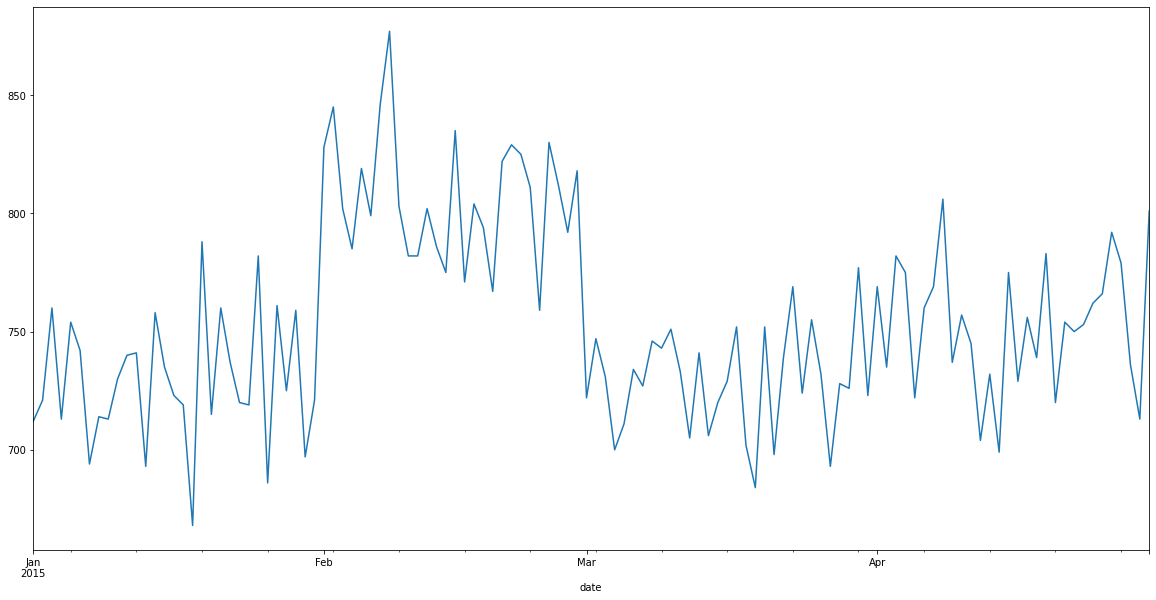

In [173]:
# look at the number of user land on home page before and after March
# the number of user land on home page increase during Feb
conversion_date_land = conversion_table.groupby('date')['user_id'].count()
conversion_date_land.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

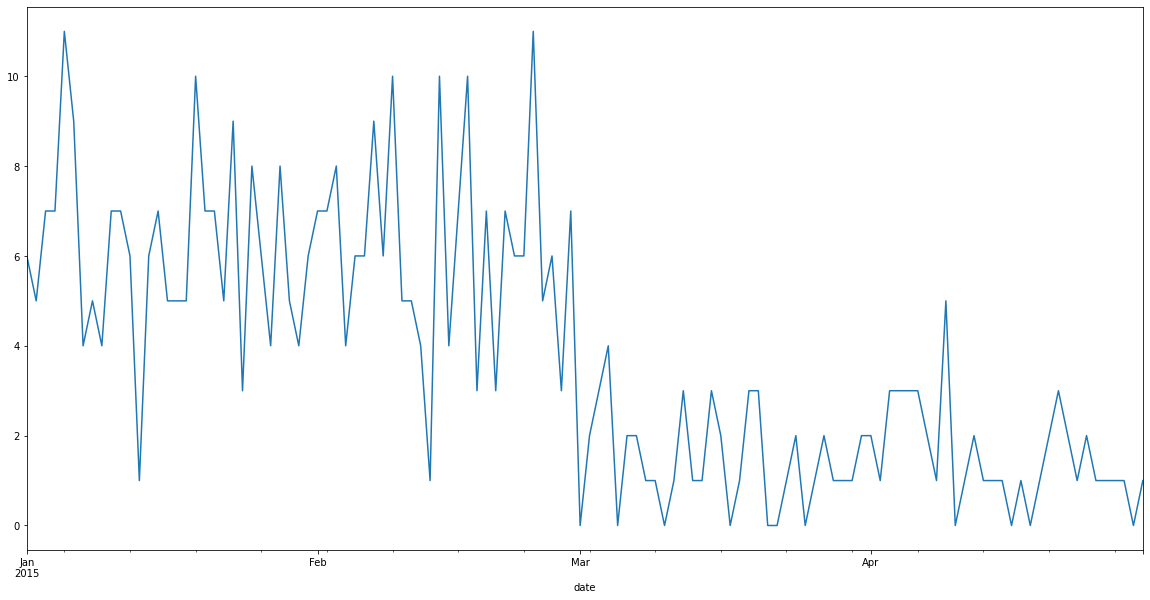

In [172]:
# look at the number of user land on payment confirmation page
# have same trend of conversion rate
# the reason for conversion rate decrease is decreasing the number of user land on payment confirmation page
conversion_date_payment = conversion_table.groupby('date')['page_payment_confirmation'].count()
conversion_date_payment.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

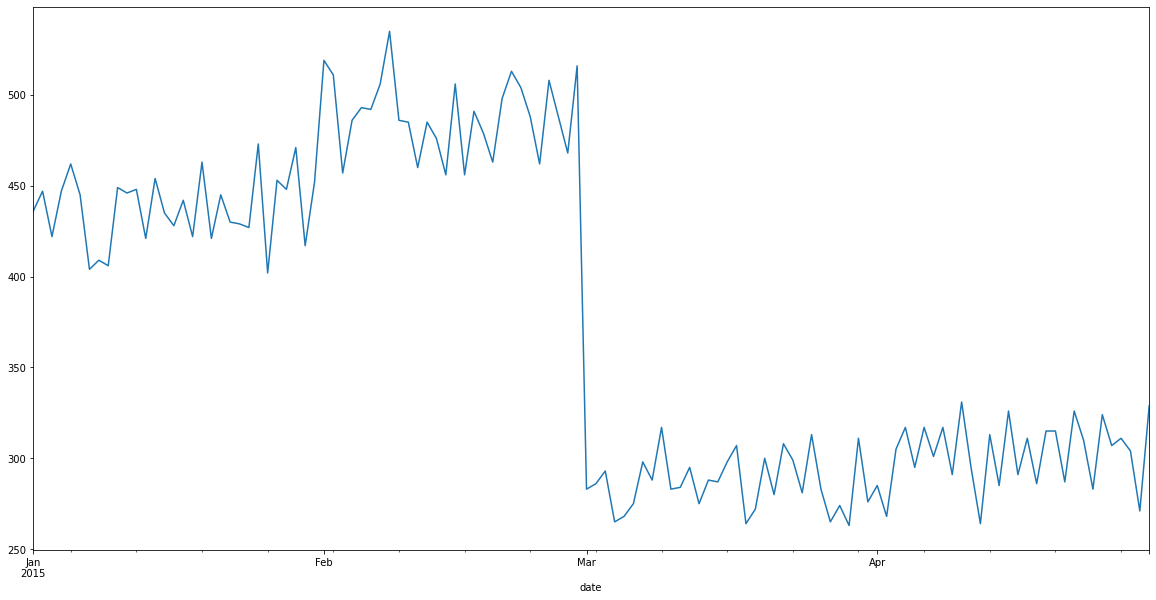

In [180]:
# the number of user land on home page have different pattern with conversion rate for each day
# look the other step between home page and payment confirmation
conversion_date_search = conversion_table.groupby('date')['page_search'].count()
conversion_date_search.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

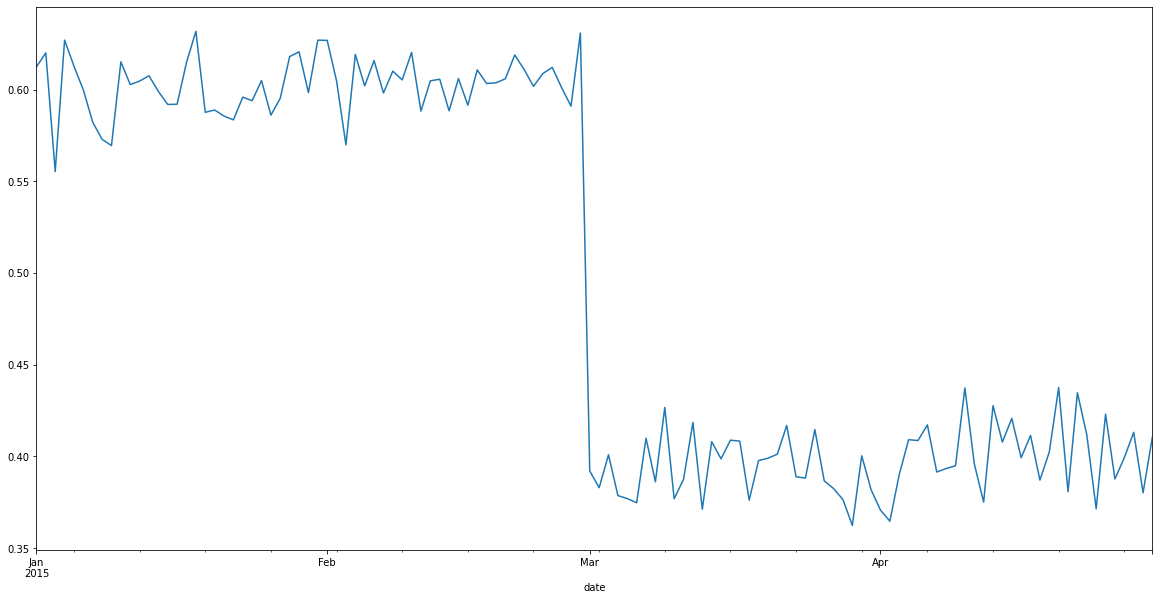

In [179]:
# look the conversion rate from home page to search page
conversion_date_search_rate = conversion_table.groupby('date')['page_search'].count()/conversion_table.groupby('date')['page_home'].count()
conversion_date_search_rate.plot.line(figsize = (20, 10))


<AxesSubplot:xlabel='date'>

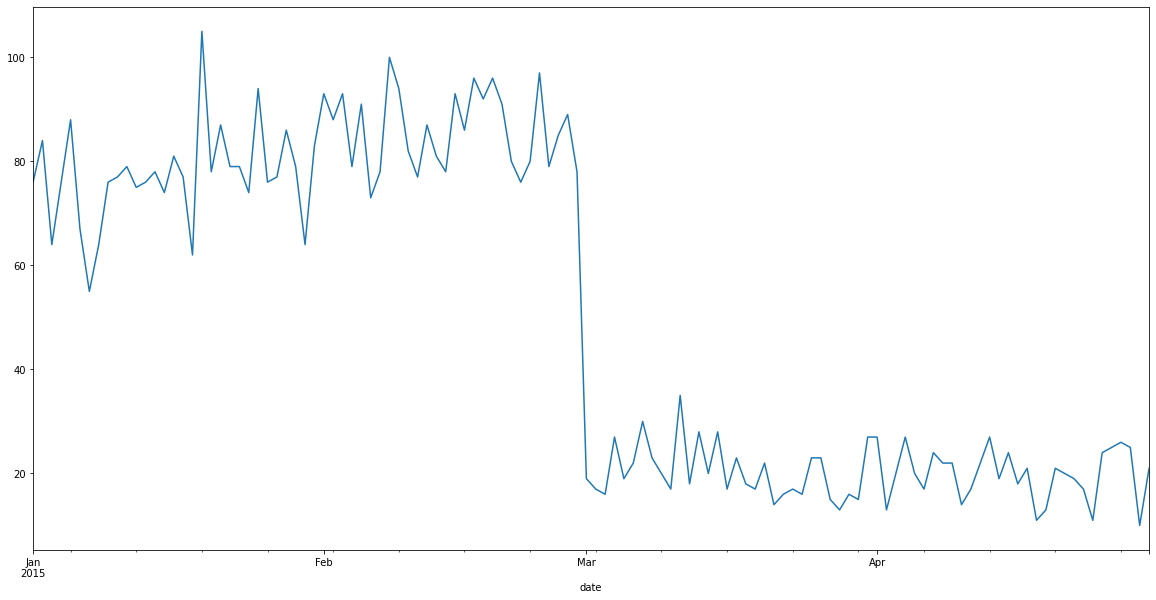

In [175]:
# look at the number of user land on payment page
conversion_date_payment = conversion_table.groupby('date')['page_payment'].count()
conversion_date_payment.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

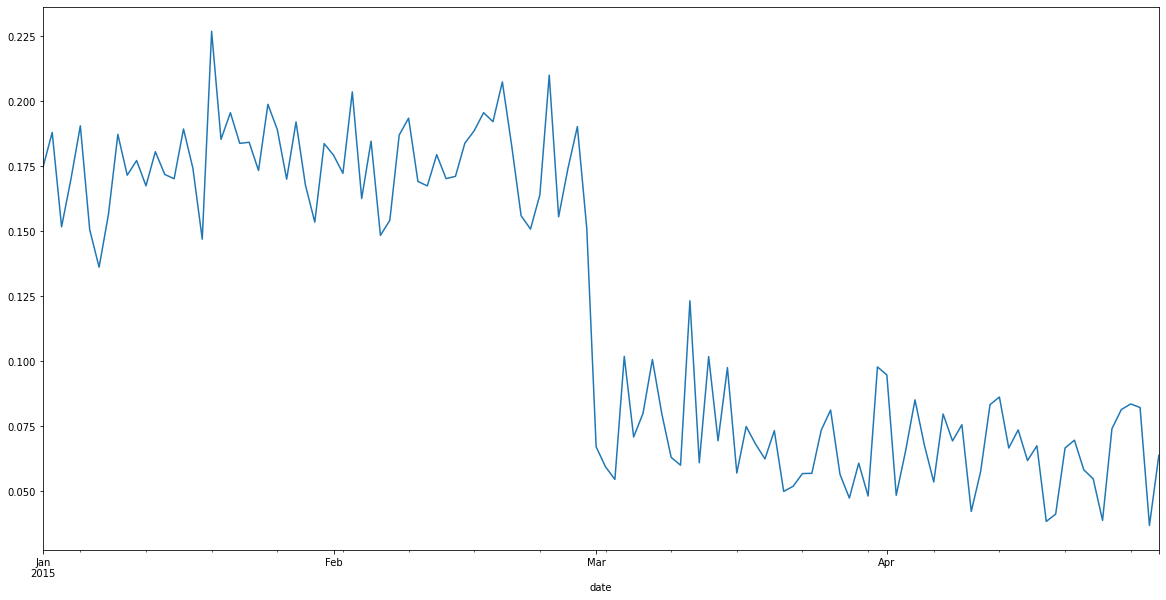

In [181]:
# look at the conversion rate between search page and payment page
conversion_date_payment_rate = conversion_table.groupby('date')['page_payment'].count()/conversion_table.groupby('date')['page_search'].count()
conversion_date_payment_rate.plot.line(figsize = (20, 10))

<AxesSubplot:xlabel='date'>

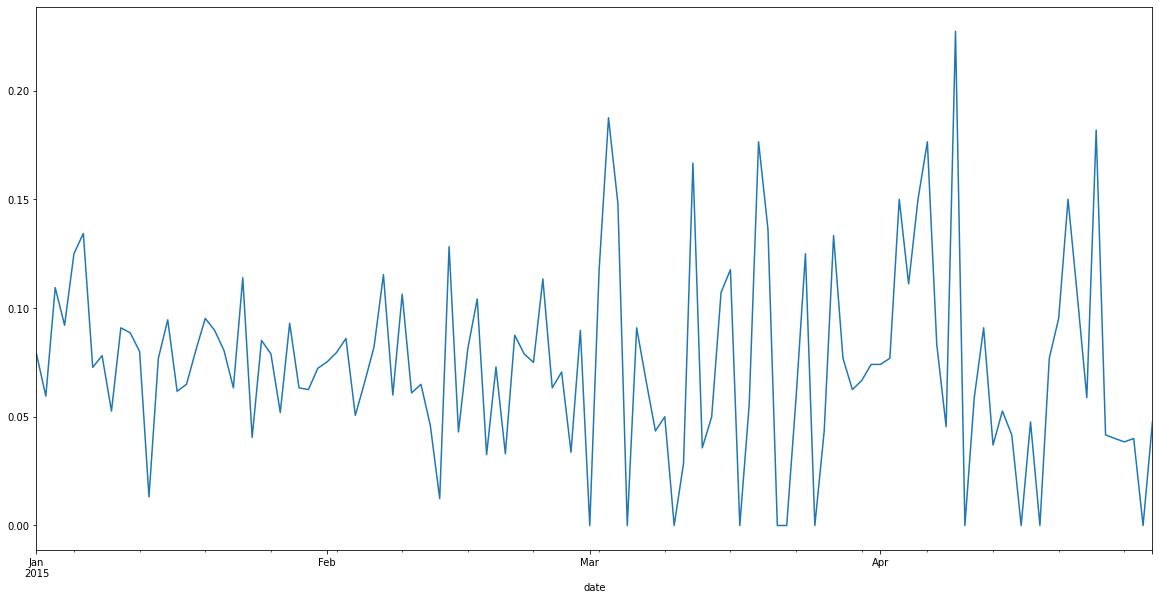

In [182]:
# the conversion rate between payment and payment confirmation page not change much
conversion_date_payment_fin_rate = conversion_table.groupby('date')['page_payment_confirmation'].count()/conversion_table.groupby('date')['page_payment'].count()
conversion_date_payment_fin_rate.plot.line(figsize = (20, 10))

In [183]:
# plot the funnel plot
# less than 1% user buy the product.

home_page_count = conversion_table['page_home'].count()
search_page_count = conversion_table['page_search'].count()
payment_page_count = conversion_table['page_payment'].count()
payment_confirmation_count = conversion_table['page_payment_confirmation'].count()

number=[home_page_count, search_page_count, payment_page_count, payment_confirmation_count]
stage=["Home Page", "Search Page", "Payment Page", "Payment Confirmation Page"]
fig = go.Figure(go.Funnel(y=["Home Page", "Search Page", "Payment Page", "Payment Confirmation Page"],
                          x=[home_page_count, search_page_count, payment_page_count, payment_confirmation_count],
                          textposition = "outside",
                          visible = True,
                          textinfo = "value+percent initial",
                          opacity = 0.6, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "gray"],
                          "line": {"width": [2, 2, 2, 1], "color": ["wheat", "wheat", "blue", "wheat"]}},
                          connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.show()




